# 2021 1학기 인공지능 기말 프로젝트
학번 & 이름: 2019320098 김어진

# 1. 실험 내용에 대한 전체 요약

  본 프로젝트에서는 Titanic data에 대해 Decision Tree, Logistic Regression, Multilayer Perception(MLP) 세 개의 분류 모델을 설계했고, 데이터에 대한 각 모델 성능을 비교했다. 모델을 설계하기 전 data를 train, validation, test set로 분류하는 과정을 거쳤다.


* Decision Tree: 
default model에 대해서 성능을 실험한 후에 class_weight, max_features, max_depth 등의 parameter를 변경시켜 실험해 보았다. class_weight는 "balanced", max_features는 "auto" "sqrt" "log2", max_depth는 5 10의 값을 각각 시도해 보았다. 성능이 좋았던 parameter에 대해서는 동시에 시도해 보았다. 그 결과, max_features="log2", max_depth=5로 설정한 모델에서 최상의 성능이 나왔다.
* Logistic Regression: 
default model에 대해서 성능을 실험한 후에 solver, penalty, class_weight 등의 parameter를 변경시켜 실험해 보았다. solver는 'iblinear', 'newton-cg', 'sag', 'saga' penalty는 'none' class_weight는 'balanced'의 값을 각각 시도해 보았다. 성능이 좋았던 parameter에 대해서는 동시에 시도해 보았다. 그 결과, penalty='none'으로 설정한 모델에서 최상의 성능이 나왔다.
* MLP: 
default model에 대해서 성능을 실험한 후에 activation, hidden_layer_size, solver 등의 parameter를 변경시켜 실험해 보았다. activation은 'identity' 'logistic' 'tanh', hidden_layer_size는 (200,) (100,2) (30,), solver는 'lbfgs' 'sgd'의 값을 각각 시도해 보았다. 성능이 좋았던 parameter에 대해서는 동시에 시도해 보았다. 그 결과, activation='logistic'으로 설정한 모델에서 최상의 성능이 나왔다.


Decision Tree, Logistic Regression, MLP에서 각각 가장 좋은 성능을 보여 준 모델을 가지고 test data set을 훈련시켰고, 여기에도 cv를 적용해서 최종 모델의 성능을 평가했다. 그 결과, MLP모델 activation='logistic'이 가장 좋은 성능을 보여주었다. 따라서 Titanic 자료를 가장 잘 파악할 수 있는 모델은 MLP activation='logistic' 이다. 



# 2. Titanic data에 대한 explanatory data analysis

In [ ]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data
url = "https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv"
df = pd.read_csv(url)

In [ ]:
# view data
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,0,1
1,1.0,1,38.0,1,0,71.2833,1,0
2,1.0,3,26.0,0,0,7.9250,1,0
3,1.0,1,35.0,1,0,53.1000,1,0
4,0.0,3,35.0,0,0,8.0500,0,1


In [ ]:
# counting data
df.value_counts()

Survived  Pclass  Age   SibSp  Parch  Fare      Sex_female  Sex_male
0.0       3       17.0  0      0      8.6625    0           1           3
          2       25.0  0      0      13.0000   0           1           3
                  23.0  0      0      13.0000   0           1           3
          3       19.0  0      0      7.8958    0           1           3
          2       30.0  0      0      13.0000   0           1           3
                                                                       ..
1.0       1       33.0  1      0      90.0000   1           0           1
                                      53.1000   1           0           1
                        0      0      86.5000   1           0           1
                  32.0  0      0      76.2917   1           0           1
0.0       1       2.0   1      2      151.5500  1           0           1
Length: 674, dtype: int64

In [ ]:
# data distribution
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


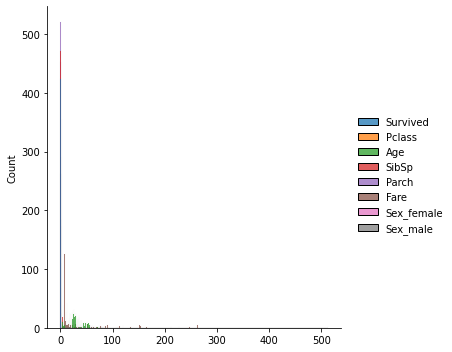

In [ ]:
# data visualization
sns.displot(df)

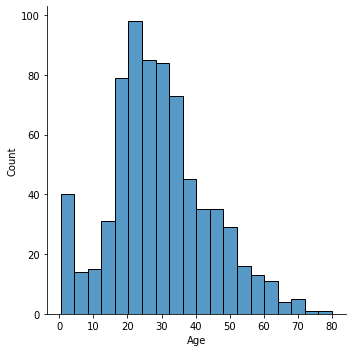

In [ ]:
# data visualization
sns.displot(df, x="Age")



*   각 feature와 그 의미: Survived(승객의 생존 여부. 1=생존, 0=사망), Pclass(좌석의 등급. 1=1등석, 2=2등석, 3=3등석), Age(승객의 나이), SibSp(함께 탑승한 형제 또는 배우자의 수), Parch(함께 탑승한 부모 또는 자녀의 수), Fare(티켓 요금), Sex_female(승객의 성별, 1=여성), Sex_male(승객의 성별, 1=남성)
*   instance 개수: 674
*   분류 목적: 본 데이터를 분류함으로 타이타닉 호에서 생존한 승객의 특징을 파악하여, 임의의 데이터에 대해 타이타닉 호에 탑승하면 살아남을 수 있을 지를 알아보고자 한다.  
*   데이터 분포: 위의 df.describe() 및 그래프 참조



# 3. 실험 설계 및 방법

* 분석에 사용할 전처리 과정을 거친 데이터 셋을 선택하고 분석한다. 본 프로젝트에서는 Titanic data를 선정했다.
* train을 위해 데이터 셋을 분리한다. (train-test split)
* Decision Tree에 대해 parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.
* Decision Tree에 대해 class_weight, criterion, max_features, max_depth 등의 parameter를 조작해서 model을 생성하고 훈련한다. 5-fold cross validation을 통해 이 model들의 성능을 검증하고, 가장 성능이 좋은 모델을 선정한다. 
* Logistic Regression에 대해 parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.
* Logistic Regression에 대해 ~등의 parameter를 조작해서 model을 생성하고 훈련한다. 5-fold cross validation을 통해 이 model들의 성능을 검증하고, 가장 성능이 좋은 모델을 선정한다
* Multilayer Perception(MLP)에 대해 parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.
* Multilayer Perception(MLP)에 대해 ~등의 parameter를 조작해서 model을 생성하고 훈련한다. 5-fold cross validation을 통해 이 model들의 성능을 검증하고, 가장 성능이 좋은 모델을 선정한다
* Decision Tree, Logistic Regression, Multilayer Perception(MLP)에 대해 선정한 각각의 최종 모델의 성능을 5-fold cross validation을 통해 평가한다. 단, 이 때에는 test set을 사용한다.
* 모든 분류 모델의 test 성능 평가를 비교하고 분석한다.


# 4. 실험 과정 (비교를 위해 시도한 trial 및 error)

## a. data를 train, validation, test set로 분리한다. (data split)

In [ ]:
# split data to X and y
y = df[["Survived"]]
X = df.drop(["Survived"], axis=1)

In [ ]:
# check
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')

In [ ]:
# split train, validation and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) #0.8 * 0.25 = 0.2

In [ ]:
# check dimension
X_train.shape

(428, 7)

## b. Decision Tree

### Decision Tree default model
parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

In [ ]:
# build and train decision tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 5-fold cross validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7569630642954857

### Decision Tree model trial and error

trial and error 과정에서는 parameter 설정에 변화를 주어 모델을 훈련했다. Decision Tree의 경우, class_weight, max_features, max_depth 등의 parameter를 변경시켜 실험해 보았다. 여기에는 5-fold cross validation을 통해 성능을 검증하는 과정까지 포함되어 있다. 

- class_weight
> {class_label:weight} 형식의 class관련 가중치이다. default 값은 None이며, 이때는 모든 클래스에 가중치가 1로 지정된다. 여기에서는 balanced 모드로 변형해 실험했는데, balanced 모드는 y 값을 사용하여 입력 데이터의 class frequency에 반비례하는 가중치를 n_samples / (n_classes * np.bincount(y)) 형식으로 자동으로 조정한다. 





In [ ]:
# class_weight="balanced"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(class_weight="balanced")
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7452257181942545

- max_features
> 최적의 분할을 찾을 때 고려해야 할 feature의 수를 의미한다. int, float, "auto", "sqrt", "log2", None의 값이 쓰일 수 있다. 여기에서는 "auto", "sqrt", "log2", None의 경우를 실험했다. 





In [ ]:
# max_features = "auto"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "auto")
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.780218878248974

In [ ]:
# max_features = "sqrt"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "sqrt")
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7637756497948016

In [ ]:
# max_features = "log2"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "log2")
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7873324213406292

In [ ]:
# max_features = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = None)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7592612859097128

* max_depth

> tree의 최대 깊이를 나타낸다. None이면, 모든 leaf가 pure일 때까지 혹은 min_sample_split 보다 적게 포함될 때까지 노드가 확장된다. 여기에서는 5, 10 등의 적당한 int를 대입해 보았다. max_depth가 5일 때 성능이 준수했다.


In [ ]:
# max_depth=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_depth=5)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7827633378932969

In [ ]:
# max_depth=10
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_depth=10)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.780328317373461

- mixture

> 단일 parameter를 변경해 보았을 때 성능이 좋아졌던 결과 위주로 parameter를 동시에 변경해 보았다. 그 결과, max_features를 "log2"로, max_depth를 5로 설정한 모델에서 최상의 성능이 나왔다. 



In [ ]:
# (BEST) max_features="log2", max_depth=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "log2", max_depth=5)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.81077975376197

### Decision tree final model
실험 결과, max_features="log2", max_depth=5로 설정한 모델에서 최상의 성능이 나왔다.

In [ ]:
# (BEST) max_features="log2", max_depth=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features = "log2", max_depth=5)
decTree.fit(X_train, y_train)
cv_results = cross_validate(decTree, X_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.81077975376197

## c. Logistic Regression

### Logistic Regression default model

parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

In [ ]:
# build and train logistic regression model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 5-fold cross validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8061012311901505

### Logistic Regression model trial and error

trial and error 과정에서는 parameter 설정에 변화를 주어 모델을 훈련했다. Logistic Regression의 경우, solver, penalty, class_weight 등의 parameter를 변경시켜 실험해 보았다. 여기에는 5-fold cross validation을 통해 성능을 검증하는 과정까지 포함되어 있다. 실험 결과, penalty를 none으로 설정한 모델의 성능이 가장 좋은 성능을 보여주었다. 

- solver
> solver는 최적화 문제에 사용할 알고리즘을 선택하는 parameter이다. 작은 data set의 경우 'liblinear'가 좋은 선택이고 'sag'와 'saga'는 큰 data set에서 좋다. solver를 liblinear, newton-cg, sag, saga 순서로 변경하며 실험해 본 결과, newton-cg에서 가장 좋은 성능이 측정되었다. 

In [ ]:
# solver='liblinear'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7990697674418604

In [ ]:
# solver='newton-cg'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, solver='newton-cg')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8061012311901505

In [ ]:
# solver='sag'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, solver='sag')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7826812585499315

In [ ]:
# solver='saga'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, solver='saga')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.780328317373461

- penalty


> penalty는 penalization에 사용되는 표준을 지정한다. 'newton-cg', 'sag', 'lbfgs' solver는 l2만 지원한다. 'elasticnet'은 오직 'saga' solver에서만 지원한다. none일 경우, regularization은 적용되지 않는다. penalty는 none 모드만 실험했는데, penalty를 none으로 했을 때 좋은 성능이 도출되었다.  



In [ ]:
# (BEST) penalty='none'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, penalty='none')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8084541723666211

- class_weight
> {class_label:weight} 형식의 class관련 가중치이다. default 값은 None이며, 이때는 모든 클래스에 가중치가 1로 지정된다. 여기에서는 balanced 모드로 변형해 실험했는데, balanced 모드는 y 값을 사용하여 입력 데이터의 class frequency에 반비례하는 가중치를 n_samples / (n_classes * np.bincount(y)) 형식으로 자동으로 조정한다. 

In [ ]:
# class_weight='balanced'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8038030095759234

- mixture

> 단일 parameter를 변경해 보았을 때 성능이 좋아졌던 결과 위주로 parameter를 동시에 변경해 보았다. 그러나 단일 parameter를 변경해 보았을 때보다 오히려 성능이 떨어지는 결과를 얻었다. 

In [ ]:
# solver='newton-cg', class_weight='balanced', penalty='none'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, solver='newton-cg', class_weight='balanced', penalty='none')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8014500683994529

### Logistic Regression final model
실험 결과, penalty='none'으로 설정한 모델에서 최상의 성능이 나왔다. 

In [ ]:
# (BEST) penalty='none'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, penalty='none')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8084541723666211

## d. MLP

### MLP default model
parameter를 조작하지 않은 default model을 생성하고 훈련한다. 5-fold cross validation을 통해 default model의 성능을 검증한다.

In [ ]:
# MLP
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# 5-fold cross validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7944459644322845

### MLP model trial and error
trial and error 과정에서는 parameter 설정에 변화를 주어 모델을 훈련했다. MLP의 경우, activation, hidden_layer_size, solver 등의 parameter를 변경시켜 실험해 보았다. 여기에는 5-fold cross validation을 통해 성능을 검증하는 과정까지 포함되어 있다. 

- activation
> hidden layer에 대한 활성화 함수이다. 'identity'는 f(x) = x를 반환한다. 'logistic'은 f(x) = 1 / (1 + exp(-x))을 반환한다. 'tanh'은 f(x) = tanh(x)를 반환한다. 'relu'는  f(x) = max(0, x)를 반환한다. 본 실험에서는 default인 relu를 제외하고 각각의 경우 모두 실험해 보았다. 



In [ ]:
# activation='identity'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='identity')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.6448153214774281

In [ ]:
# activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8014774281805745

In [ ]:
# activation='tanh'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8013953488372092

- hidden_layer_sizes

> i번째 요소는 i번째 hidden layer에 있는 뉴런의 수를 나타낸다. 임의의 다양한 int 값을 대입해 보았다.



In [ ]:
# hidden_layer_sizes=(200,)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7921477428180574

In [ ]:
# hidden_layer_sizes=(100,2)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,2), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.6827359781121751

In [ ]:
# hidden_layer_sizes=(30,)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7944459644322845

- solver


> weight 최적화를 위한 parameter이다. 'lbfgs'는 quasi-Newton 방법 계열의 최적화 도구이다 .'sgd'는 stochastic gradient descent을 일컫는다. 'adam'은 stochastic gradient-based optimizer를 가리킨다. 기본값 'adam'을 제외한 'lbfgs', 'sgd'에 대해 실험했다.



In [ ]:
# solver='lbfgs'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, solver='lbfgs')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.6121477428180575

In [ ]:
# solver='sgd'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, solver='sgd')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7080711354309165

* mixture

> 준수한 결과가 나온 activation='logistic', 'tanh' 값과 hidden_layer_sizes=(10,) 를 동시에 변경해 보았다. 그러나 단일 parameter를 변경할 때보다 좋은 결과가 나오지는 않았다.



In [ ]:
# hidden_layer_sizes=(10,), activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7944733242134063

In [ ]:
# hidden_layer_sizes=(10,), activation='tanh'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7897400820793432

### MLP final model
실험 결과, activation='logistic'으로 설정한 모델에서 최상의 성능이 나왔다. 

In [ ]:
# activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.8014774281805745

# 5. 실험 결과 비교

위 과정에서 산출한 Decision Tree, Logistic Regression, MLP모델 성능을 5-fold cross validation으로 평가한다. 최종적인 모델 평가이기 때문에 여기서는 5-fold cross validation에 test set를 사용해서 평가했다. test data set에 대해 평가해 본 결과 셋 모두 train set에 대해 평가한 것보다 성능이 다소 저하된 것을 확인할 수 있었다. 세 모델 중 activation='logistic'으로 설정한 MLP final model이 가장 좋은 성능을 보여주었다. 

### Decision tree final model
max_features="log2", max_depth=5

In [ ]:
# (BEST) max_features="log2", max_depth=5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier(max_features="log2", max_depth=5)
decTree.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(decTree, X_test, y_test, cv=5)
np.mean(cv_results['test_score'])

0.6354679802955665

### Logistic Regression final model
penalty='none' 

In [ ]:
# (BEST) penalty='none'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression(max_iter=10000, random_state=42, penalty='none')
lr.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(lr, X_test, y_test.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7211822660098521

### MLP final model
activation='logistic'

In [ ]:
# activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_test, y_test.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7263546798029556

# 6. 결론

Titanic 데이터에서, 가장 좋은 성능을 보여준 model은 MLP이었다. 이 때 parameter는 activation='logistic'으로 설정되어야 한다. test data set에서 실험해 보았을 때 cross validation test score, test accuracy, test precision, test recall, test f1, test roc auc는 아래와 같다. 따라서 Titanic 데이터를 분석할 때, MLP 모델 activation='logistic'을 쓴다면 다른 모델에 비해 준수한 결과를 얻을 수 있을 것이라고 예상된다. 

In [ ]:
# activation='logistic'
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10000, random_state=42, activation='logistic')
mlp.fit(X_train, y_train.values.ravel())
cv_results = cross_validate(mlp, X_test, y_test.values.ravel(), cv=5)
np.mean(cv_results['test_score'])

0.7263546798029556

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(lr, X_test, y_test.values.ravel(), scoring=scoring, cv=5)
cv_results.keys()
print(np.mean(cv_results['test_accuracy']))
print(np.mean(cv_results['test_precision']))
print(np.mean(cv_results['test_recall']))
print(np.mean(cv_results['test_f1']))
print(np.mean(cv_results['test_roc_auc']))

0.7211822660098521
0.6625
0.6303030303030303
0.6267988812611238
0.7787433155080213
